#  Spotify Reviews Analysis with NLP Techniques

# About the dataset : 
Spotify is one of the largest music streaming service providers, with over 422 million monthly active users, including 182 million paying subscribers, as of March 2022.


# Extraction data

In [6]:
import pandas as pd
df = pd.read_csv("C:/Users/Venkat Dyagala/Desktop/tba finale/reviews.csv")
df.head(20)



,Date_submied,Review,Rating,Total_thumbsup,Reply
0,09-07-2022,"Great music service, the audio is high quality...",5,2,NaN
1,09-07-2022,Please ignore previous negative rating. This a...,5,1,NaN
2,09-07-2022,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,09-07-2022,Really buggy and terrible to use as of recently,1,1,NaN
4,09-07-2022,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,09-07-2022,The player controls sometimes disappear for no...,3,7,NaN
6,09-07-2022,I love the selection and the lyrics are provid...,5,0,NaN
7,09-07-2022,Still extremely slow when changing storage to ...,3,16,NaN
8,09-07-2022,It's a great app and the best mp3 music app I ...,5,0,NaN
9,09-07-2022,"I'm deleting this app, for the following reaso...",1,318,NaN


first 20 values

some information about the data

In [7]:
df.columns
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date_submied    61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


finding null values

In [8]:
df.isna().sum()

Date_submied          0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [9]:
df['length'] = df['Review'].str.len()
df.head()

,Date_submied,Review,Rating,Total_thumbsup,Reply,length
0,09-07-2022,"Great music service, the audio is high quality...",5,2,NaN,112
1,09-07-2022,Please ignore previous negative rating. This a...,5,1,NaN,86
2,09-07-2022,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,106
3,09-07-2022,Really buggy and terrible to use as of recently,1,1,NaN,47
4,09-07-2022,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,100


# plot for rating

<AxesSubplot:xlabel='Rating', ylabel='count'>

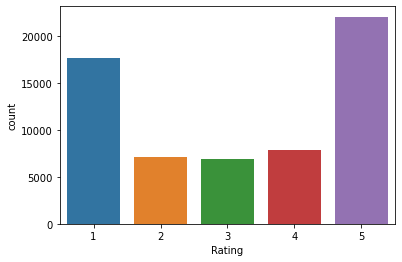

In [11]:
import seaborn as sns

#  'Rating' is the column you want to plot counts for
sns.countplot(data=df, x='Rating')


<AxesSubplot:>

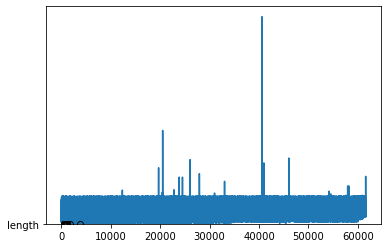

In [12]:
df['length'].plot()
df['length'].plot(kind='box', vert=False)

##histogram plot

<AxesSubplot:ylabel='Frequency'>

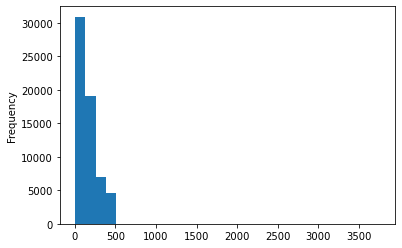

In [13]:
df['length'].plot(kind='hist', bins=30)

In [14]:
##making reviews into lowercase
df['Review'] = df['Review'].str.lower()

Stopwords

In [25]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'this', 'and', 'our', 'during', "weren't", 'isn', 'their', 'doing', 'mustn', 'she', 'they', 'such', 'while', 'when', 'doesn', 'only', 'more', "don't", 'o', 'you', 'no', 'an', 'being', 'myself', 'themselves', 'very', 'other', 'his', "didn't", 'am', 'if', 'few', "you'll", 'here', 'own', 'up', 'haven', 'but', 'why', 'my', 'as', 'needn', 'out', "you'd", 'those', 'should', 'mightn', 'further', 'over', 'because', 'theirs', 'about', 'weren', "it's", 'herself', 'didn', 'some', 'there', 'these', 'me', "aren't", "she's", "hasn't", 'at', 'your', "wouldn't", 'be', 'yourself', 'd', 'its', 'now', 'so', 'has', 'into', "that'll", 'off', 'for', 'not', 'by', 'himself', 'having', "couldn't", 'were', 'y', "should've", 'what', 'after', 'wouldn', "hadn't", 'her', 'hers', 'are', 'just', "haven't", 'does', "mustn't", 'm', "mightn't", 've', 'ourselves', 'yourselves', 'until', 'again', 'how', 'the', 'them', 'shan', 'or', 'through', 'all', 'yours', 'same', 'hasn', 'once', 'wasn', 'had', 'him', 'do', 'whom', 'ha

[nltk_data] Downloading package stopwords to C:\Users\Venkat
[nltk_data]     Dyagala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import re
from nltk.corpus import stopwords
from nltk import download
download('stopwords', quiet=True)
english_stop_words = set(stopwords.words('english'))

def tokenize(text):
    return re.findall(r'\b[a-zA-Z][a-zA-Z-]*\b', text)

def remove_stop_words(tokens):
    return [token for token in tokens if token.lower() not in english_stop_words]
def text_preparation_pipeline(text):
    functions = [str.lower, tokenize, remove_stop_words]
    result = text
    for function in functions:
        result = function(result)
    return result

# Word frequency

counting tokens

In [12]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
app,36060
music,25766
spotify,19100
songs,18393
song,14957
play,11686
like,9835
listen,9346
love,9025


# Barplot for word frequency

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

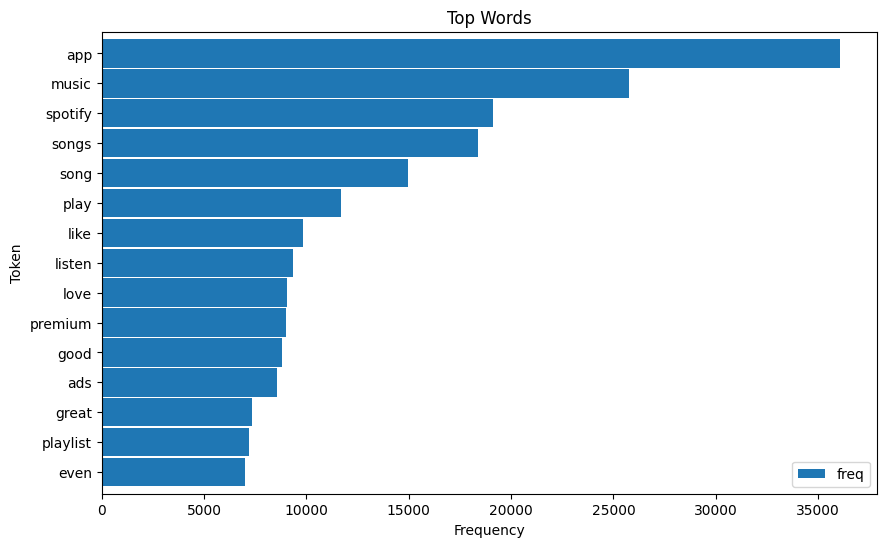

In [13]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(10,6))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# word cloud

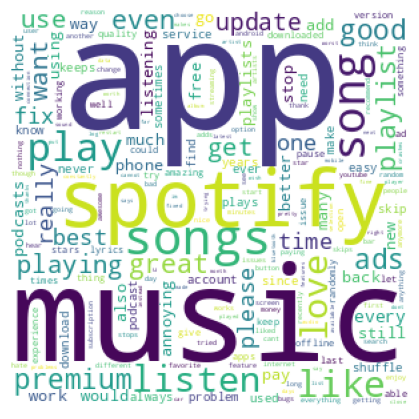

In [14]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (4, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##TFIDF

# TFIDF and comparing


In [15]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [16]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
app,36060,33312.303714
music,25766,30681.353651
spotify,19100,28470.886229
songs,18393,29260.250758
song,14957,27475.299015


# Wordcloud for TFIDF

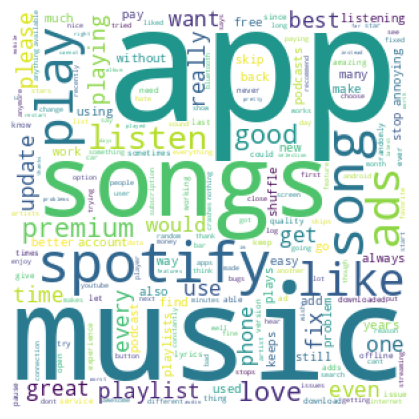

In [17]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (4, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [36]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [37]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Venkat Dyagala\anaconda3\lib\site-p

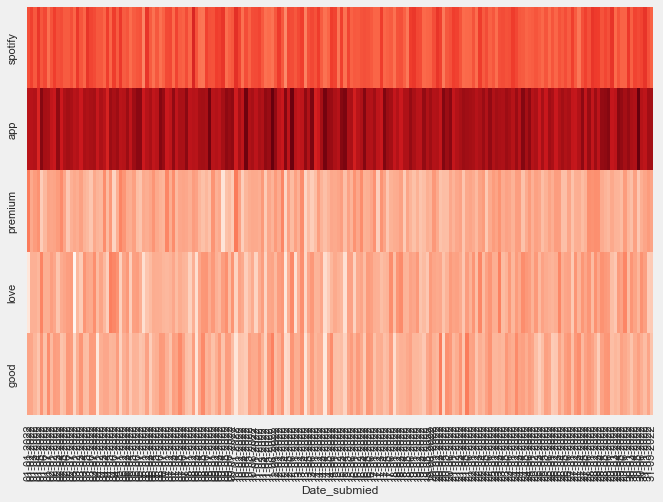

In [38]:
import seaborn as sns
keywords = ['spotify','app','premium','love','good']
freq_df = count_keywords_by(df, by='Date_submied', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Date_submied')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

# Sentiment analysis using Lexicon based approach(Bing liu's lexicon).


In [28]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
 opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
 opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data] Downloading package opinion_lexicon to C:\Users\Venkat
[nltk_data]     Dyagala\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [29]:
nltk.download('punkt')
df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
 word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
 word_dict[word] = neg_score

[nltk_data] Downloading package punkt to C:\Users\Venkat
[nltk_data]     Dyagala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Creating a Dictionary


In [30]:
#creating dictinary
def bing_liu_score(text):
 sentiment_score = 0
 bag_of_words = word_tokenize(text.lower())
 for word in bag_of_words:
     if word in word_dict:
         sentiment_score += word_dict[word]
 return sentiment_score

# removing nullvalues


In [31]:
#removing nullvalues
df['Review'].fillna('no review', inplace=True)
df['Bing_Liu_Score'] = df['Review'].apply(bing_liu_score)

In [32]:
df[['Rating',"Review", 'Bing_Liu_Score']].head(10)

,Rating,Review,Bing_Liu_Score
0,5,"great music service, the audio is high quality...",4
1,5,please ignore previous negative rating. this a...,0
2,4,"this pop-up ""get the best spotify experience o...",0
3,1,really buggy and terrible to use as of recently,-2
4,1,dear spotify why do i get songs that i didn't ...,0
5,3,the player controls sometimes disappear for no...,-1
6,5,i love the selection and the lyrics are provid...,1
7,3,still extremely slow when changing storage to ...,0
8,5,it's a great app and the best mp3 music app i ...,4
9,1,"i'm deleting this app, for the following reaso...",0


In [52]:
df.groupby('Review').agg({'Bing_Liu_Score':'mean'})


,Bing_Liu_Score
Review,
! it would be nice if one could sort the songs in one's own playlist manuel or after genres. -sometimes i have the feeling that the app is a little bit buggy or weird because sometimes it doesn't let me put songs in repeat. +but all in one it's a nice app.,0.0
"!!!! the best app ever, wenn it comes to music",1.0
"!warning! scam alert! i recently had wished to end my premium services, so i asked spotify to stop charging me. they continued to charge me for multiple months dispite my wishes not to. they only stopped after the second time i told them to stop stealing my money and threatened to go to my bank to look into legal actions. do not do business with them, they will lie, cheat, and steal from you. whatever and if they respond to this, know they're full of it and will do the same to you.",-6.0
"""...loading more music than pandora"" and you weren't kidding! lyrics to almost every song at least that i've noticed little video background to each song best artist backgrounds and bios you just can't get any more informative and better than this i've learned so much things about music and songs i've loved that i never would have known like certain guitarists and people collaborating with this person to create this song on this album never would have known...",4.0
"""30 minutes of ad free listening""? i don't think i've even got 5 decent music selection, fairly easy to use, but the ads are a nightmare",3.0
...,...
🙂so much ad,0.0
"🙌🏽🙌🏽🙌🏽🙌🏽. it is relatively less costly, gives you lyrics, consumes less data, and the app has classic graphics. it is actually the best music streaming app. thank you spotify.",2.0
🤔awesome music app w/an excellent & vast array of high quality songs.!!!🤘😎🤘,1.0


In [57]:
# Dropping duplicate Reviews
data.drop_duplicates(subset='Review', inplace=True, ignore_index=True)
data.shape

C:\Users\Venkat Dyagala\AppData\Local\Temp\ipykernel_17316\2321022193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset='Review', inplace=True, ignore_index=True)


(61326, 2)

In [58]:
# Remove URL, mentions and hashtags
def remove_url_mentions_hashtag(text):
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'@\S*','',text)
    return re.sub(r'#\S*','',text)

data.Review = data.Review.apply(remove_url_mentions_hashtag)

C:\Users\Venkat Dyagala\AppData\Local\Temp\ipykernel_17316\1166742755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Review = data.Review.apply(remove_url_mentions_hashtag)


In [60]:
# Expand contractions
def remove_contractions(text):
    text = text.lower()

    text = text.split()
    new_text = []

    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)

    text = " ".join(new_text)

    return text

data.Review = data.Review.apply(remove_contractions)

C:\Users\Venkat Dyagala\AppData\Local\Temp\ipykernel_17316\3886513301.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Review = data.Review.apply(remove_contractions)


Text(0.5, 1.0, '30 most frequent words before removing stopwords')

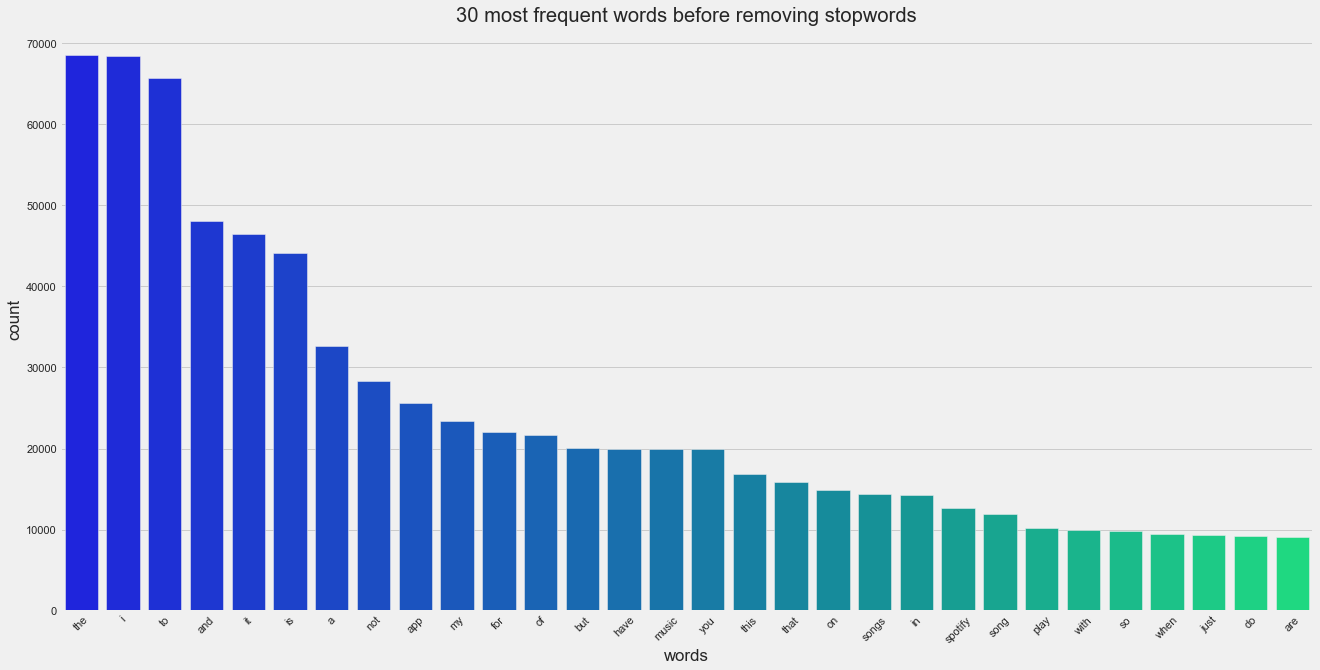

In [61]:
# Join all words
review_words = ','.join(list(data['Review'].values))

# Count and find the 30 most frequent
counter = Counter(review_words.split())
most_frequent = counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
_ = pd.DataFrame(most_frequent, columns=('words', 'count'))
sns.barplot(x='words', y='count', data= _, palette='winter')
plt.xticks(rotation=45)
plt.title("30 most frequent words before removing stopwords")

In [62]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(["spotify", "app", "song","music", "songs"])

def lemmatization(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text, deacc=True):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stopwords_list:
            result.append(lemmatization(token))

    return result

data["Review_Clean_List"] = data.Review.apply(preprocess)

C:\Users\Venkat Dyagala\AppData\Local\Temp\ipykernel_17316\1826314770.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Review_Clean_List"] = data.Review.apply(preprocess)


In [63]:
# Convert list to string
def to_string(text):
    text = ' '.join(map(str, text))
    return text

data['Review_Clean'] = list(map(to_string, data['Review_Clean_List']))

C:\Users\Venkat Dyagala\AppData\Local\Temp\ipykernel_17316\1958240055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Clean'] = list(map(to_string, data['Review_Clean_List']))


In [64]:
data[data["Review_Clean_List"].str.len() == 0]

,Review,Rating,Review_Clean_List,Review_Clean
1212,100% has everything!,5,[],
3682,in this app all songs are there,3,[],
8893,there are others out there but i always go bac...,5,[],
9004,,2,[],
9195,spotify and only spotify for me!,5,[],
14059,every songs is there !!,5,[],
17665,it does not have all the songs,1,[],
18458,could not ever be without my spotify.,5,[],
20037,all the songs ever made. or most of them..,4,[],
23046,it is spotify after all,5,[],


In [66]:
data = data[data["Review_Clean_List"].str.len() != 0]

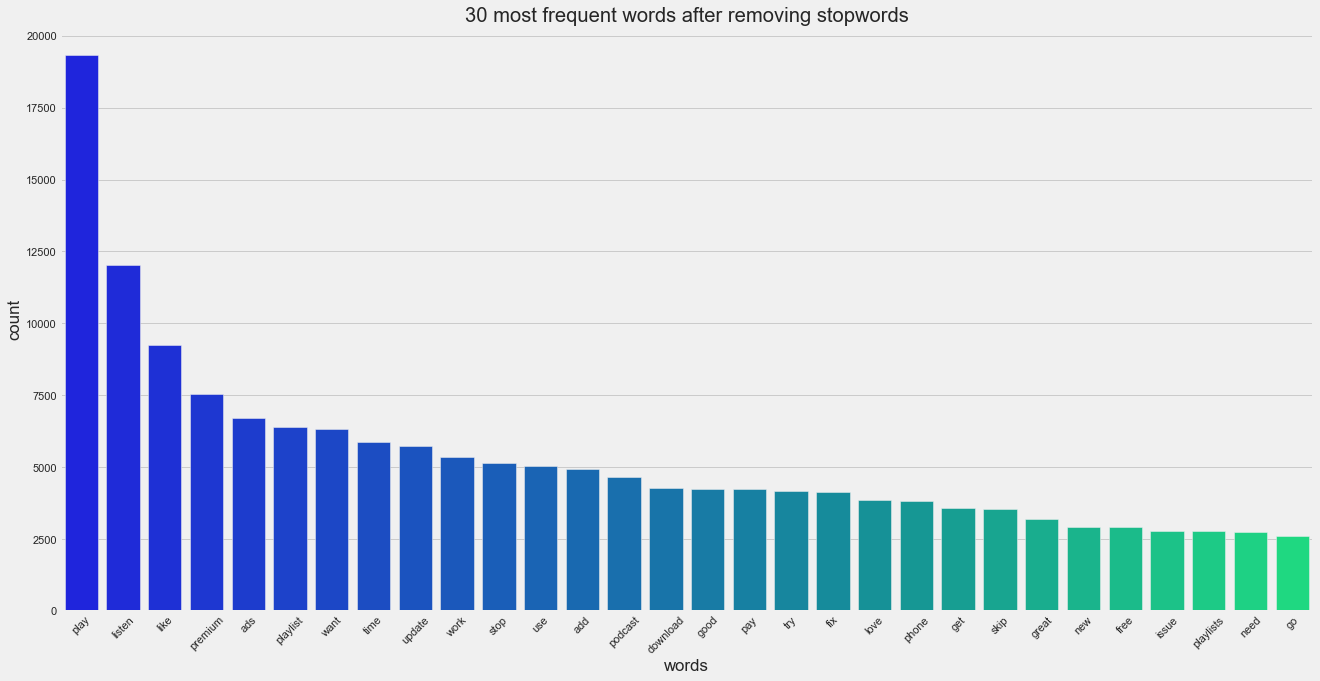

In [67]:
# Join all words
review_words = ','.join(list(data['Review_Clean'].values))

# Count and find the 30 most frequent
counter = Counter(review_words.split())
most_frequent = counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
_ = pd.DataFrame(most_frequent, columns=('words', 'count'))
sns.barplot(x='words', y='count', data= _, palette='winter')
plt.xticks(rotation=45)
plt.title("30 most frequent words after removing stopwords");

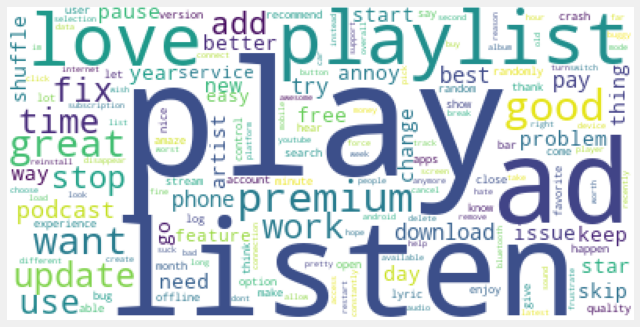

In [68]:
# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      contour_width=8,
                      contour_color='steelblue',
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Named entity recognition

In [51]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string("https://www.pcmag.com/reviews/spotify")
article = nlp(ny_bb)
len(article.ents)

877

In [45]:
displacy.render(article, style='ent', jupyter=True)

C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\spacy\displacy\__init__.py:71: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [46]:
from collections import Counter
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 297,
         'DATE': 220,
         'WORK_OF_ART': 22,
         'PERSON': 118,
         'LAW': 7,
         'CARDINAL': 84,
         'ORDINAL': 4,
         'PRODUCT': 10,
         'EVENT': 15,
         'QUANTITY': 8,
         'MONEY': 24,
         'GPE': 38,
         'FAC': 18,
         'NORP': 5,
         'LANGUAGE': 1,
         'LOC': 3,
         'TIME': 3})

In [47]:
sentences = [x for x in article.sents]
print(sentences[45])
displacy.render(nlp(str(sentences[17])), jupyter=True, style='ent')

Apple MacBook Air 13-Inch (2024, M3) Razer Blade 16 (2024) All Laptops Desktop Computers Lenovo ThinkStation P5 Workstation HP Z6 G5 A Workstation Lenovo IdeaCentre Mini (2023)


C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\spacy\displacy\__init__.py:71: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# popular NERS

In [60]:
[(x.orth_,x.pos_, x.lemma_) for x in [y
                                      for y
                                      in nlp(str(sentences[17]))
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('Pros', 'PROPN', 'Pros'),
 (' ', 'SPACE', ' '),
 ('Cool', 'PROPN', 'Cool'),
 ('AI', 'PROPN', 'AI'),
 ('powered', 'VERB', 'power'),
 ('DJ', 'PROPN', 'DJ'),
 (' ', 'SPACE', ' '),
 ('Collaborative', 'PROPN', 'Collaborative'),
 ('playlists', 'NOUN', 'playlist'),
 ('Group', 'PROPN', 'Group'),
 ('Session', 'PROPN', 'Session'),
 ('options', 'NOUN', 'option'),
 (' ', 'SPACE', ' '),
 ('Optional', 'PROPN', 'Optional'),
 ('desktop', 'NOUN', 'desktop'),
 ('app', 'NOUN', 'app'),
 ('lets', 'VERB', 'let'),
 ('play', 'VERB', 'play'),
 ('locally', 'ADV', 'locally'),
 ('stored', 'VERB', 'store'),
 ('audio', 'ADJ', 'audio'),
 ('files', 'NOUN', 'file'),
 (' ', 'SPACE', ' '),
 ('Premium', 'PROPN', 'Premium'),
 ('accounts', 'NOUN', 'account'),
 ('let', 'VERB', 'let'),
 ('hear', 'VERB', 'hear'),
 ('select', 'ADJ', 'select'),
 ('albums', 'NOUN', 'album'),
 ('released', 'VERB', 'release'),
 (' ', 'SPACE', ' '),
 ('Robust', 'PROPN', 'Robust'),
 ('Student', 'PROPN', 'Student'),
 ('plan', 'NOUN', 'plan'),
 ('fe

# Sentence dependency tree

In [48]:
import spacy
from spacy import displacy
sentence = sentences[20]
# Visualize dependency parsing
displacy.render(nlp(str(sentence)), style='dep', jupyter=True, options={'distance': 120})


C:\Users\Venkat Dyagala\anaconda3\lib\site-packages\spacy\displacy\__init__.py:71: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#THANK YOU